In [1]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1. The Ensemble
A common theme in applied Machine Learning is *The Ensemble Method*. Ensemble methods use multiple machine learning models (these models can be the same type or different algorithms entirely). The idea is that using ensembles improves predictive performance, because even though our models are sometimes incorrect, it's unlikely that a MAJORITY of the models in our ensemble will all be incorrect in the exact same way each time. Therefore in aggregate, we will get a more accurate model.

Each model gets a "vote" about what category a data point should be in (ensemble methods also work for continuous outcomes, but here we'll focus on categorical ones). Whichever category gets the most "votes" is the category we choose for that data point. 

To combat overfitting and reduce potential *over-reliance* on a small number of features, we can use the two following techniques when creating models for our ensemble:

* **Bagging (Bootstrap Aggregating)**: Instead of using all of our training data to train each model in our sample we use **bootstrapping** to choose the samples we will include.
    * **Bootstrapping** is when you randomly sample data points *with replacement*, meaning that a data point can be included in your bootstrapped sample *more* than once, OR not at all.
* **Random Feature Selection**: Instead of using all the available features/predictors in our dataset for every model, for each model we randomly choose a different subset of features to use when training. This helps our ensemble generalize, because it doesn't become overly reliant on one feature (since that feature might not appear in every model).

While ensemble methods take a lot of computational power (you're training MANY models instead of just one), in practice they're often really useful. An incredibly popular ensemble method is the **Random Forest** which is an ensemble method that uses a bunch of decision trees along with Bagging and Random Feature selection to generate the ensemble.

## 1.1 Building a Random Forest

Let's build a tiny random forest function of our own! The `Forest()` that takes in 5 arguments:

* `n_samples` (**integer**): number of bootstrapped samples to use to train each decision tree.
* `n_features` (**integer**): number of randomly selected features from your data set to use when training.
* `n_trees` (**integer**): how many decision trees to create for the ensemble.
* `X` (**data frame**): the *already* z-scored predictor data to be used.
* `y` (**data frame**): the outcome data to be used (`X` and `y` are the same length, and the $i^{th}$ element of `X` corresponds to the $i^{th}$ element of `y`)

The function should:

1. (DONE FOR YOU) use a for loop to create `n_trees` models and store them in a list called `forest` (yes! You can store fitted decision trees in a list!)
2. (DONE FOR YOU) For each model you should choose use bootstrapping to sample `n_samples` data points to train each model. Remember that boostrapping means sampling WITH replacement (hint: try using [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to randomly select (*with replacement*) which row numbers/indices to use.
3. (DONE FOR YOU) For each model, randomly select `n_features` to use to train your model. (hint: try using [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to randomly select (*withOUT replacement*) which predictor indices to use.
4. For each model, train the model (no need to use model validation, and assume X is already z-scored).
5. (DONE FOR YOU) Return a list (`forest`) of dictonaries that look like this (where `tree` is your trained model and `samples_index` is an array of indices for the features/predictors you selected):
 ```{"tree": tree, "feats": samples_index}```
 
 
 ## Bootstrapping (before we start)
 The code block below gives an example of how we can use `np.random.choice()` to bootstrap samples from a dataframe.

In [2]:
# How to BOOTSTRAP

## simple bootstrapping example of names dataframe 
np.random.seed(1234)

names = ["Alex", "Charlie", "Addison", "James", "Blake", "Greg", "Daniel", "Susan", "Erik", "Georgia", "Kayne",
         "Lydia", "Peter", "Jane", "Jasper", "Link", "Rhett", "John", "Miranda", "Luke", "Leia", "Janet", "Jung",
         "Anthony", "Mark", "Torrence", "Bonnie", "Rudy", "Lisa", "Bart", "Tina", "Marie"]

# create data
names_df = pd.DataFrame({"name": names, "age": np.random.randint(17,27, len(names))})
names_df

# bootstrap a sample
# np.random.choice(possible values, number of samples to choose, sample with replacement?)
names_index = np.random.choice(range(0,len(names)), len(names), replace = True)
names_boot = names_df.iloc[names_index]

# notice how Lisa shows up more than once?
names_boot

,name,age
14,Jasper,26
19,Luke,19
7,Susan,24
28,Lisa,20
10,Kayne,25
11,Lydia,17
14,Jasper,26
28,Lisa,20
17,John,17
23,Anthony,17


In [3]:
def Forest(X, y, n_samples = 1000, n_features = 5, n_trees = 100):
    forest = []
    
    # 1. create models for the ensemble
    for i in range(0,n_trees):
        
        # 2. randomly bootstrap datapoints
        possible_rows_index = range(0,X.shape[0])
        samples_index = np.random.choice(possible_rows_index, n_samples, replace = True)
        
        
        # 3. randomly choose features
        possible_features_index = range(0,X.shape[1])
        
        if n_features >= X.shape[1]: #if they ask for more features than you have, select all features...
            features_index = possible_features_index
        else:
            features_index = np.random.choice(possible_features_index, n_features, replace = False)
        
        # 4. select only the rows and features that were randomly selected above and train tree
        
        ### YOUR CODE HERE ###
        X_bagged = X.iloc[samples_index, features_index]
        y_bagged = y.iloc[samples_index]
        
        tree = DecisionTreeClassifier()
        tree.fit(X_bagged,y_bagged)
        
         ### /YOUR CODE HERE ###
            
        # 5. add tree to forest
        forest.append({"tree": tree, "feats": features_index})
    return(forest)       

## 1.2 Use `Forest()`
Using `X1` and `y1` as your training set, call `Forest()` to build an ensemble model.

In [4]:
X1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/X_cols_df.csv")
y1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/y_df.csv")
X1.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249
0,-0.272837,0.206200,1.641906,2.011086,-0.873472,0.497003,0.462470,1.775982,0.091421,-0.654229,...,0.326900,-1.081661,-2.761833,-0.227940,-0.202936,0.175920,1.145533,0.517384,-0.629482,0.951622
1,0.704831,-1.817195,-1.337849,2.006721,-0.622258,-0.784856,-2.096367,-0.280310,1.125115,-1.648478,...,1.319550,-1.597311,-0.079034,-0.147779,1.182280,1.768567,2.920293,-0.724872,0.147568,-1.026752
2,-1.361056,2.894286,0.944402,-1.415230,0.453117,2.260426,0.390655,0.025920,0.325527,-0.779292,...,-0.316042,0.325779,0.477544,-1.253684,-0.126424,0.496384,0.585087,1.208882,0.906346,-0.846152
3,-0.099394,-0.069847,1.039601,2.537628,0.238186,-0.239785,-1.532541,0.611437,1.207815,-0.779757,...,1.766062,-0.564589,1.057444,-0.881056,-1.476124,-0.496656,-0.952391,0.358682,0.449233,-0.307559
4,-0.507454,1.337364,0.937558,1.366908,0.105800,1.792870,-1.048294,-0.527191,-0.267588,0.798682,...,-0.547537,-0.173542,0.502203,-0.576244,0.784273,-1.769254,-0.265143,1.636512,-0.946507,-0.131387


In [5]:
y1.head()

,0
0,a
1,a
2,a
3,a
4,a


In [6]:
### YOUR CODE HERE ###

my_forest = Forest(X1,
                   y1,
                   n_features = 5,
                   n_trees = 100) ### call Forest and create an ensemble with 100 trees and 5 features per tree

### /YOUR CODE HERE ###

## 1.3 Comparing Ensemble to an Individual Model

- Use the `ForestPredictor()` function below (which takes in the ensemble created by `Forest()` and data) to generate predictions for `X2`, our *test* set.
- Use the `ForestPredictor()` function below (which takes in the ensemble created by `Forest()` and data) to generate predictions for `X1`, our *train* set.
- calculate the accuracy of your ensemble.
- calculate the accuracy for ONE of your ensemble models by using `oneModel = my_forest[0]` to grab the first model of your ensemble. 

### 1.3.1
In this example, does an ensemble method do *better* (in terms of train accuracy) than an individual decision tree? Explain how you figured this out.

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


### Answer

YES, the ensemble is more accurate on training data (and actually on testing data as well) when compared to individual trees.

### 1.3.2
In this example, does an ensemble method do *better* (in terms of overfitting) than an individual decision tree? Use `X2` and `y2` as the test set.

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer

Both seem quite overfit in this case, which means we may need to adjust the # of trees, # of features per tree, or the max depth of the trees to help prevent overfitting even MORE.

In [7]:
# NO NEED TO CHANGE ANYTHING HERE
def ForestPredictor(forest, X):
    import operator
    from collections import Counter

    ps = []

    # get predictions from each model
    for model in forest:
        tree = model["tree"]
        X_sub = X.iloc[:, model["feats"]]

        p = tree.predict(X_sub)
        ps.append(p)

    ps = pd.DataFrame(ps)
    
    # get ensemble prediction for each data point
    predictions = []
    
    for column_ind in range(0, ps.shape[1]):
        ensemble_predict = ps.iloc[:,column_ind]
        predictions.append(ensemble_predict.mode()[0])

    return(predictions)

In [8]:
# Import our Test Set
X2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/X_cols_df2.csv")
y2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/y_df2.csv")

# ForestPredict() will take your ensemble and use it to find the predicted values for the test set
ensemble_predictions =  ForestPredictor(my_forest, X2) #Call ForestPredictor using my_forest and X_cols_df2

In [9]:
# calculate the accuracy for the ensemble
acc_e = accuracy_score(y2, ensemble_predictions)
print("Test Acc (Ensemble) is: ", acc_e)

Test Acc (Ensemble) is:  0.6175


In [10]:
# calculate the accuracy for the first model
oneModel = my_forest[0]

acc_o = accuracy_score(y2, oneModel["tree"].predict(X2.iloc[:,oneModel["feats"]]))
print("Test Acc (OneModel) is: ", acc_o)

Test Acc (OneModel) is:  0.29


In [11]:
ensemble_predictions =  ForestPredictor(my_forest, X1) ### Call ForestPredictor using my_forest and X_cols_df2
print("Train Acc (Ensemble) is: ", accuracy_score(y1, ensemble_predictions))
print("Train Acc (OneModel) is: ", accuracy_score(y1, oneModel["tree"].predict(X1.iloc[:,oneModel["feats"]])))

Train Acc (Ensemble) is:  1.0
Train Acc (OneModel) is:  0.625


## 1.4 Comparing Ensemble to an Individual Models

- put the accuracy from your ENSEMBLE model in the code below
- run the cell to see a histogram of the individual tree accuracies, and the (dashed line) ensemble accuracy.

### 1.4.1
Write down your thoughts about this graph. What patterns do you see between individual tree accuracies and ensemble accuracies?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

### Answer

the ensemble accuracy is consistently higher than the distribution of individual tree accs, which show us that even though individual trees get things wrong a LOT, the MAJORITY of trees get each data point right most of the time. Since ensembles make predictions by letting individual trees vote, this means that at least all the trees are wrong in DIFFERENT ways that allow the ensemble to make better predictions.

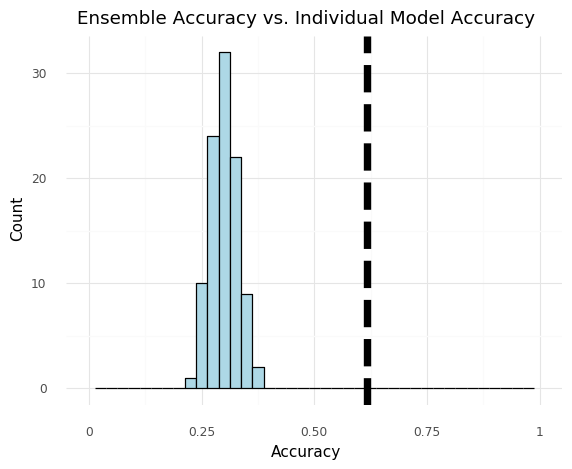

<ggplot: (8765699986472)>

In [12]:
### YOUR CODE HERE ###
ensemble_acc = acc_e### put your ensemble accuracy here!
### /YOUR CODE HERE ###

# calculates the accuracy of each model in the ensemble
allAcc = [accuracy_score(y2,my_forest[mod]["tree"].predict(X2.iloc[:,my_forest[mod]["feats"]])) for mod in range(0,len(my_forest))]

# plot individual model accuracies (blue hist) and ensemble accuracy (black line)
df = pd.DataFrame({"acc": allAcc, "no": range(0,len(my_forest))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc, linetype = "dashed", size = 3) +
labs(title = "Ensemble Accuracy vs. Individual Model Accuracy",
    x = "Accuracy",
    y = "Count"))


### 1.4.2
How does the difference between individual tree accuracies and ensemble accuracies change when you change the number of predictors used in each tree?
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

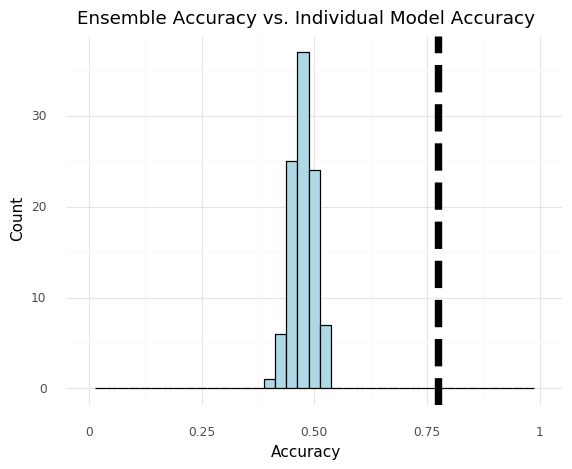

<ggplot: (8765698418707)>

In [13]:
### YOUR CODE HERE ###
n_feat = 249
### /YOUR CODE HERE ###


# build a new model with n_feat features
my_forest2 = Forest(X1, y1, n_features = n_feat)
ensemble_acc2 = accuracy_score(y2, ForestPredictor(my_forest2, X2))


# calculates the accuracy of each model in the ensemble
allAcc2 = [accuracy_score(y2,my_forest2[mod]["tree"].predict(X2.iloc[:,my_forest2[mod]["feats"]])) for mod in range(0,len(my_forest2))]


# plot individual model accuracies (blue hist) and ensemble accuracy (black line)
df = pd.DataFrame({"acc": allAcc2, "no": range(0,len(my_forest2))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc2, linetype = "dashed", size = 3) +
labs(title = "Ensemble Accuracy vs. Individual Model Accuracy",
    x = "Accuracy",
    y = "Count"))


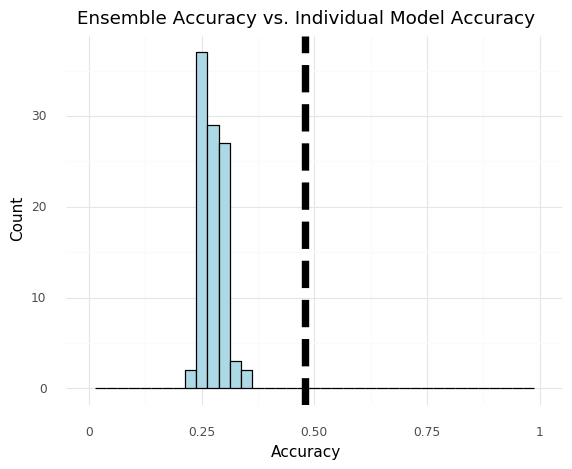

<ggplot: (8765698421589)>

In [14]:
### YOUR CODE HERE ###
n_feat = 2
### /YOUR CODE HERE ###

# build a new model with n_feat features
my_forest2 = Forest(X1, y1, n_features = n_feat)
ensemble_acc2 = accuracy_score(y2, ForestPredictor(my_forest2, X2))


# calculates the accuracy of each model in the ensemble
allAcc2 = [accuracy_score(y2,my_forest2[mod]["tree"].predict(X2.iloc[:,my_forest2[mod]["feats"]])) for mod in range(0,len(my_forest2))]


# plot individual model accuracies (blue hist) and ensemble accuracy (black line)
df = pd.DataFrame({"acc": allAcc2, "no": range(0,len(my_forest2))})
(ggplot(df, aes(x = "acc")) +
 geom_histogram(color = "black", fill = "lightblue", binwidth = 0.025) +
 xlim([0,1]) + theme_minimal() + geom_vline(xintercept = ensemble_acc2, linetype = "dashed", size = 3) +
labs(title = "Ensemble Accuracy vs. Individual Model Accuracy",
    x = "Accuracy",
    y = "Count"))


### Answer

The 2 feature trees still display a similar pattern of the ensemble being better than the individual trees, however the increase/distance between the ensemble and trees is slightly smaller and for 2 features BOTH the individual tree acc and the ensemble acc are WAYYY LOWER.